In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
# import seaborn as sns
%matplotlib inline
# sns.set(rc={'figure.figsize':(15,8)})

In [3]:
import numpy as np
Eth = np.genfromtxt(fname=r'dataset\seq_eth/obsmat.txt')

In [4]:
columns = ['frame_number', 'pedestrian_ID', 'pos_x' ,'pos_z', 'pos_y', 'v_x', 'v_z', 'v_y']

In [5]:
df_Eth = pd.DataFrame(Eth,columns = columns)

In [6]:
df_Eth.head()

,frame_number,pedestrian_ID,pos_x,pos_z,pos_y,v_x,v_z,v_y
0,780.0,1.0,8.456844,0.0,3.588066,1.671714,0.0,0.176292
1,786.0,1.0,9.125530,0.0,3.658583,1.662877,0.0,0.326723
2,792.0,1.0,9.787146,0.0,3.849445,1.683334,0.0,0.371084
3,798.0,1.0,10.472197,0.0,3.955450,1.598568,0.0,0.264795
4,804.0,1.0,11.066000,0.0,4.061280,1.574526,0.0,0.456390


In [7]:
df_Eth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8908 entries, 0 to 8907
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   frame_number   8908 non-null   float64
 1   pedestrian_ID  8908 non-null   float64
 2   pos_x          8908 non-null   float64
 3   pos_z          8908 non-null   float64
 4   pos_y          8908 non-null   float64
 5   v_x            8908 non-null   float64
 6   v_z            8908 non-null   float64
 7   v_y            8908 non-null   float64
dtypes: float64(8)
memory usage: 556.9 KB


In [8]:
df_Eth.drop(['pos_z','v_z'],axis=1,inplace = True)

In [9]:
df_Eth.head()

,frame_number,pedestrian_ID,pos_x,pos_y,v_x,v_y
0,780.0,1.0,8.456844,3.588066,1.671714,0.176292
1,786.0,1.0,9.125530,3.658583,1.662877,0.326723
2,792.0,1.0,9.787146,3.849445,1.683334,0.371084
3,798.0,1.0,10.472197,3.955450,1.598568,0.264795
4,804.0,1.0,11.066000,4.061280,1.574526,0.456390


Calculating the speed 
    Speed = distance / time 
    here, time is 2.5 sec because the data is given at 2FPs and distance we can calculate as change in position x and position y.
    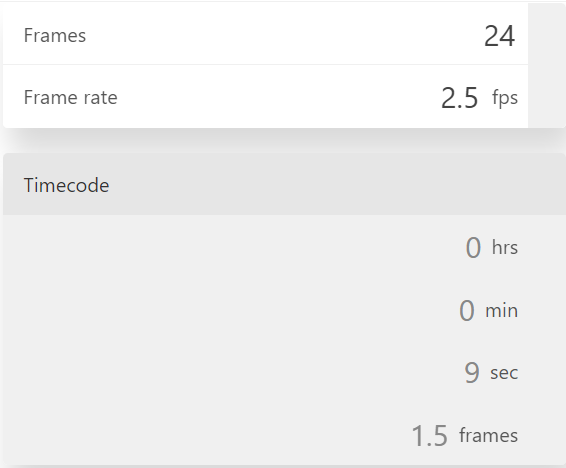
    
 let's say we have 2.5FPS frame in an ideal condition 24 frame would become 1 sec so at the speed of 2.5FPS  the total time taken for 24 frames would be 9 sec. hence
        for 1 formula it would be 9/24 = 0.375 second for 1 frame . 
        with this formula
            we have 8908 number of frames so total time taken would be 56 min 3 sec = 3363 seconds.
            
  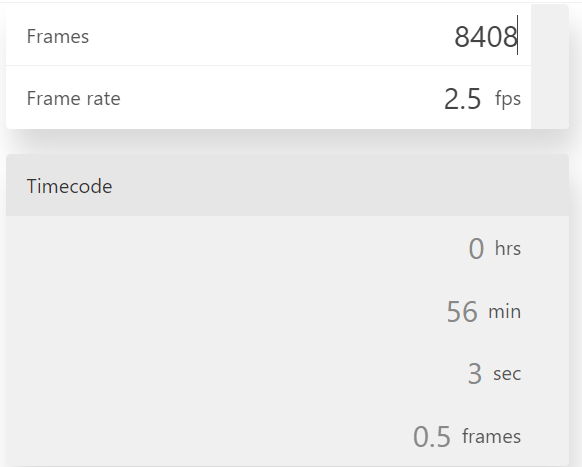
            
            so, the total time taken from 1 frame would be 3363/8908 = 0.38 (round(0.377))
             applying this formula 

A. Calculating the speed

In [11]:
def calculate_speed(df, time):
    data = df.copy()
    data['Constant_speed'] = 0
    for frame in data.index:
        x = data['pos_x'][frame]
        y = data['pos_y'][frame]
        speed = abs(x-y)/time # speed cannot be negative and we have time as 2.5 frame per sec
        data['Constant_speed'][frame] = speed
    return data

In [12]:
data1 = calculate_speed(df_Eth, 0.38)

C:\Users\RVISHW~1\AppData\Local\Temp/ipykernel_19396/1598606114.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Constant_speed'][frame] = speed


In [13]:
data1.head()

,frame_number,pedestrian_ID,pos_x,pos_y,v_x,v_y,Constant_speed
0,780.0,1.0,8.456844,3.588066,1.671714,0.176292,12
1,786.0,1.0,9.125530,3.658583,1.662877,0.326723,14
2,792.0,1.0,9.787146,3.849445,1.683334,0.371084,15
3,798.0,1.0,10.472197,3.955450,1.598568,0.264795,17
4,804.0,1.0,11.066000,4.061280,1.574526,0.456390,18


#### Another Solution 

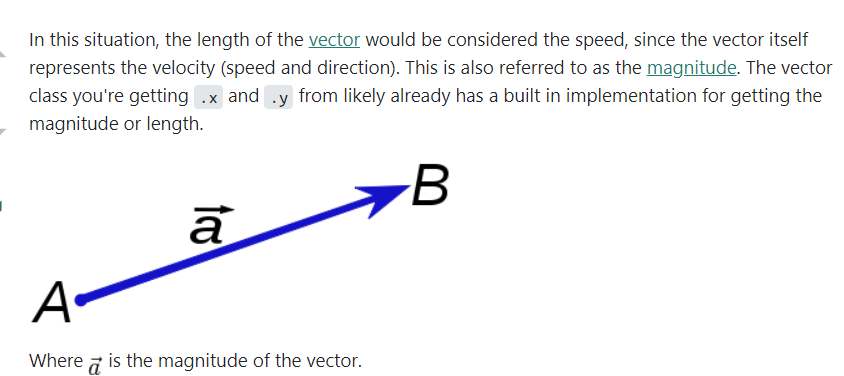

In [14]:
def calculate_magnitude(df):
    data = df.copy()
    data['Speed_as_magnitude'] = 0
    for frame in data.index:
        x = data['pos_x'][frame]
        y = data['pos_y'][frame]
        magnitude = sqrt((x)**2 + (y)**2)
        data['Speed_as_magnitude'][frame] = magnitude
    return data

In [15]:
data2 = calculate_magnitude(data1)

C:\Users\RVISHW~1\AppData\Local\Temp/ipykernel_19396/3992029092.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Speed_as_magnitude'][frame] = magnitude


In [16]:
data2.head()

,frame_number,pedestrian_ID,pos_x,pos_y,v_x,v_y,Constant_speed,Speed_as_magnitude
0,780.0,1.0,8.456844,3.588066,1.671714,0.176292,12,9
1,786.0,1.0,9.125530,3.658583,1.662877,0.326723,14,9
2,792.0,1.0,9.787146,3.849445,1.683334,0.371084,15,10
3,798.0,1.0,10.472197,3.955450,1.598568,0.264795,17,11
4,804.0,1.0,11.066000,4.061280,1.574526,0.456390,18,11


B. euclidean distance (and/or direction vector) from the destination points (if not given, think about
how to extract it)


In [17]:
# eculidean distance using destination matrix 
Destintion = np.genfromtxt(fname=r'dataset\seq_eth/destinations.txt')

In [18]:
dest_ = []
for  i in range(Destintion.shape[0]):
    dest_.append(tuple(Destintion[i:i+1].ravel()))

In [19]:
from math import sqrt

def euclidean_distance_with_destination(df, destination):
    data = df.copy()
    for i in range(len(destination)):
        data['euclidean_distance_'+str(i+1)+'_destination'] = ''
        for frame in df.index:
                x1 = destination[i][0]
                y1 = destination[i][1] #taking y1 similar to the y2 assuming that the pedestrian is in the same lane
                x2 = df['pos_x'][frame]
                y2 = df['pos_y'][frame]
                ED = sqrt((x2-x1)**2 + (y2-y1)**2)
                #print(ED)
                data['euclidean_distance_'+str(i+1)+'_destination'][frame] = ED
    return data

In [20]:
data3= euclidean_distance_with_destination(data2,dest_)

C:\Users\RVISHW~1\AppData\Local\Temp/ipykernel_19396/3610678570.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['euclidean_distance_'+str(i+1)+'_destination'][frame] = ED


In [21]:
data3.head()

,frame_number,pedestrian_ID,pos_x,pos_y,v_x,v_y,Constant_speed,Speed_as_magnitude,euclidean_distance_1_destination,euclidean_distance_2_destination,euclidean_distance_3_destination,euclidean_distance_4_destination
0,780.0,1.0,8.456844,3.588066,1.671714,0.176292,12,9,28.547123,15.453889,17.14392,6.938212
1,786.0,1.0,9.125530,3.658583,1.662877,0.326723,14,9,29.208351,16.121264,17.699584,6.278376
2,792.0,1.0,9.787146,3.849445,1.683334,0.371084,15,10,29.854694,16.80882,18.203441,5.590079
3,798.0,1.0,10.472197,3.955450,1.598568,0.264795,17,11,30.531446,17.500226,18.775961,4.906794
4,804.0,1.0,11.066000,4.061280,1.574526,0.456390,18,11,31.117833,18.10272,19.272981,4.312196


C. euclidean distance from the nearest obstacle point (if obstacle positions are given).

In [22]:
# reading the XML file
import xml.etree.ElementTree as ET
file = 'https://github.com/crowdbotp/OpenTraj/blob/master/datasets/ETH/seq_eth/map.xml'
tree = ET.parse(r'dataset\seq_eth/map.xml')
root = tree.getroot()
data  =[]
for x in root[0][0][0][0]:
    data.append(x.attrib)

In [23]:
obstacles = pd.DataFrame(data)
obstacles.drop('thickness', inplace = True, axis = 1)

In [24]:
obstacles

,x1,y1,x2,y2
0,-0.793,-0.595,14.167,-0.727
1,14.167,-0.727,14.216,4.893
2,14.222,6.359,14.098,13.000
3,14.580,12.995,-0.683,12.656


In [25]:
obstacles_array = []

In [26]:
for i in obstacles.index:
    obstacles_array.append((obstacles['x1'][i], (obstacles['y1'][i])))
    obstacles_array.append((obstacles['x2'][i], (obstacles['y2'][i])))

In [27]:
obstacles_array

[('-0.793', '-0.595'),
 ('14.167', '-0.727'),
 ('14.167', '-0.727'),
 ('14.216', '4.893'),
 ('14.222', '6.359'),
 ('14.098', '13.000'),
 ('14.580', '12.995'),
 ('-0.683', '12.656')]

In [28]:
def ED_nearest_obstacle_point(df, obstacles_array):
    data = df.copy()
    data['euclidean_distance_with_obstacles'] = ''
    for frame in data.index:
        total_Ed = []
        for i in range(len(obstacles_array)):
            x1 = float(obstacles_array[i][0])
            y1 = float(obstacles_array[i][1]) #taking y1 similar to the y2 assuming that the pedestrian is in the same lane
            x2 = float(df['pos_x'][frame])
            y2 = float(df['pos_y'][frame])
            #print(x1, y1, x2, y2)
            ED = sqrt((x2-x1)**2 + (y2-y1)**2)
            total_Ed.append(ED)
        #print(min(total_Ed))
        data['euclidean_distance_with_obstacles'][frame] = min(total_Ed)
    return data

In [29]:
data4 = ED_nearest_obstacle_point(data3, obstacles_array)

C:\Users\RVISHW~1\AppData\Local\Temp/ipykernel_19396/4269457135.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['euclidean_distance_with_obstacles'][frame] = min(total_Ed)


In [30]:
data4.head()

,frame_number,pedestrian_ID,pos_x,pos_y,v_x,v_y,Constant_speed,Speed_as_magnitude,euclidean_distance_1_destination,euclidean_distance_2_destination,euclidean_distance_3_destination,euclidean_distance_4_destination,euclidean_distance_with_obstacles
0,780.0,1.0,8.456844,3.588066,1.671714,0.176292,12,9,28.547123,15.453889,17.14392,6.938212,5.905144
1,786.0,1.0,9.125530,3.658583,1.662877,0.326723,14,9,29.208351,16.121264,17.699584,6.278376,5.238002
2,792.0,1.0,9.787146,3.849445,1.683334,0.371084,15,10,29.854694,16.80882,18.203441,5.590079,4.550138
3,798.0,1.0,10.472197,3.955450,1.598568,0.264795,17,11,30.531446,17.500226,18.775961,4.906794,3.859412
4,804.0,1.0,11.066000,4.061280,1.574526,0.456390,18,11,31.117833,18.10272,19.272981,4.312196,3.257953


In [31]:
#grouped_df = []
#for group in Groups:
#    grouped_df.append(df_Eth[df_Eth['pedestrian_ID'].isin(group)].groupby('frame_number')['pos_x','pos_y','v_x','v_y'].mean().reset_index())

In [32]:
#group_DF =  pd.concat(grouped_df, ignore_index=True, axis=0)

Since, We the neighbors are the Id which are in the same frame number first we will find the the frames which has more than 1 counts 
Here we can see all these padestrian exits in the same time frame that means they are all neighbors.
but how we can determin the eculidean distance between them.
    algorithm : 1 we will check which pedestrian is the nearest one we can get this with the help of Ed itself from one to another respectively and then choose the minimum one.

Assumption: Pedestrian Id is assigned in increasing order. first id is the current position.

In [33]:
data4[data4['frame_number']==10437.0].sort_values('pedestrian_ID')

,frame_number,pedestrian_ID,pos_x,pos_y,v_x,v_y,Constant_speed,Speed_as_magnitude,euclidean_distance_1_destination,euclidean_distance_2_destination,euclidean_distance_3_destination,euclidean_distance_4_destination,euclidean_distance_with_obstacles
6641,10437.0,238.0,12.425078,3.598078,-0.001690,-0.048872,23,12,32.50364,19.34066,20.70359,3.326569,2.210028
6635,10437.0,257.0,-4.654081,4.398813,-1.546889,-0.145885,23,6,15.415005,4.745999,7.706891,19.795687,6.312378
6631,10437.0,258.0,13.627785,6.734011,0.698569,-0.706456,18,15,33.63923,21.289339,20.825708,1.884939,0.702656
6633,10437.0,259.0,12.305222,6.589381,0.509150,-0.127506,15,13,32.313532,19.989944,19.585155,2.983014,1.930573
6634,10437.0,260.0,-4.633106,3.422221,-1.447960,0.140652,21,5,15.558524,3.885432,8.661285,19.856334,5.55738
6636,10437.0,261.0,-2.490861,4.394353,-2.172011,-0.357599,18,5,17.570092,5.96173,8.506931,17.636987,5.27033
6637,10437.0,262.0,-2.598290,3.205288,-1.670521,0.018294,15,4,17.602528,5.078661,9.523244,17.862138,4.207287
6646,10437.0,263.0,10.317086,6.830459,1.048154,0.130533,9,12,30.332723,18.210449,17.608226,4.954185,3.933272
6649,10437.0,264.0,10.434316,7.727990,1.181171,0.009712,7,12,30.491797,18.669413,17.486652,5.148794,4.027491
6643,10437.0,265.0,10.259904,3.637782,1.174629,0.585178,17,10,30.341143,17.224637,18.721108,5.21668,4.150454


In [34]:
# let's assume that the we are in the first poisiton of sort data frame points that would be
current_position = (12.425078,3.598078) # from sorted dataframe 

In [35]:
def solve(pts, pt):
    x, y = pt
    idx = -1
    smallest = float("inf")
    for p in pts:
        if p[0] == x or p[1] == y:
            dist = abs(x - p[0]) + abs(y - p[1]) # Notes: Use eucledian distance here
            if dist < smallest:
                idx = pts.index(p)
                smallest = dist
            elif dist == smallest:
                if pts.index(p) < idx:
                    idx = pts.index(p)
                    smallest = dist
    return idx

In [36]:
X = list(data4[data4['frame_number']==10437.0]['pos_x'])

In [37]:
Y = list(data4[data4['frame_number']==10437.0]['pos_y'])

In [38]:
points = [(X[i],Y[i]) for i in range(len(X)) if X[i]!= current_position[0] and Y[1]!= current_position[1]]

In [39]:
points

[(12.882271, 5.0211619),
 (13.627785, 6.7340111),
 (12.261965, 4.3054403),
 (12.305222, 6.5893808),
 (-4.6331056, 3.4222213),
 (-4.6540809, 4.398813),
 (-2.4908607, 4.3943532),
 (-2.59829, 3.205288),
 (13.744859, 5.8593654),
 (10.994426, 4.2222748),
 (2.1009692, 5.4440986),
 (10.519067, 5.0740253),
 (10.259904, 3.6377818),
 (-3.9573703, 9.1520458),
 (10.342413, 4.6408392),
 (10.317086, 6.8304592),
 (4.9722169, 7.083595),
 (3.1432385, 7.0666219),
 (10.434316, 7.7279897),
 (-4.1888909, 5.5946114),
 (11.457756, 6.1738619),
 (8.8771602, 6.2345918),
 (9.2540288, 5.5280145),
 (8.180095, 5.6166233),
 (10.07439, 5.8113417)]

In [40]:
idx = solve(points, current_position) # we will get the index position of minimum distance from current position

In [41]:
points[idx] # this is the coordinate which is having nearest distance

(10.07439, 5.8113417)

In [42]:
list(set(data4[data4['frame_number'].map(data4['frame_number'].value_counts()) > 1]['frame_number']))

[8193.0,
 8199.0,
 8205.0,
 8211.0,
 8217.0,
 8223.0,
 8229.0,
 8235.0,
 8241.0,
 8247.0,
 8253.0,
 8259.0,
 8265.0,
 8271.0,
 8277.0,
 8283.0,
 8289.0,
 8295.0,
 8301.0,
 8307.0,
 8313.0,
 8319.0,
 8325.0,
 8331.0,
 8337.0,
 8343.0,
 8349.0,
 8355.0,
 8361.0,
 8367.0,
 8373.0,
 8379.0,
 8385.0,
 8391.0,
 8397.0,
 8403.0,
 8409.0,
 8415.0,
 8421.0,
 8427.0,
 8433.0,
 8439.0,
 8445.0,
 8451.0,
 8457.0,
 8463.0,
 8469.0,
 8475.0,
 8481.0,
 8487.0,
 8493.0,
 8499.0,
 8505.0,
 8511.0,
 8517.0,
 8523.0,
 8529.0,
 8535.0,
 8541.0,
 8547.0,
 8553.0,
 8559.0,
 8565.0,
 8571.0,
 8577.0,
 8583.0,
 8589.0,
 8595.0,
 8601.0,
 8607.0,
 8613.0,
 8619.0,
 8709.0,
 8715.0,
 8721.0,
 8727.0,
 8733.0,
 8739.0,
 8745.0,
 8751.0,
 8757.0,
 8763.0,
 8769.0,
 8775.0,
 8781.0,
 8787.0,
 8793.0,
 8799.0,
 8805.0,
 8811.0,
 8859.0,
 8865.0,
 8871.0,
 8877.0,
 8883.0,
 8889.0,
 8895.0,
 8901.0,
 8907.0,
 8913.0,
 8919.0,
 8925.0,
 8931.0,
 8937.0,
 8943.0,
 8949.0,
 8955.0,
 8961.0,
 8967.0,
 8973.0,
 8979.0,
 

In [43]:
def find_ED_neighbors(df):
    data = df.copy()
    data['euclidean_distance_neighbor'] = 0 # Notes(Sakif): Replace 0 with a higher number like 100 
    # if there are two Id in same frame then they will be the neibour of each other  handling  this case first
    frames = list(set(data[data['frame_number'].map(data['frame_number'].value_counts()) == 2]['frame_number']))
    for frame in frames:
        id_ = list(data[data['frame_number']==frame].index)
        x = list(data[data['frame_number']==frame]['pos_x']) # seperating the dataframe
        y = list(data[data['frame_number']==frame]['pos_y'])
        Ed =  sqrt((x[1]-x[0])**2 + (y[1]-y[0])**2) # calculating the Ed between them and them putting the value in the main data at the same position
        for i in id_:
            data.loc[i,'euclidean_distance_neighbor'] = Ed
    return data
        
        
    

In [44]:
data5 = find_ED_neighbors(data4)

In [45]:
data5.head()

,frame_number,pedestrian_ID,pos_x,pos_y,v_x,v_y,Constant_speed,Speed_as_magnitude,euclidean_distance_1_destination,euclidean_distance_2_destination,euclidean_distance_3_destination,euclidean_distance_4_destination,euclidean_distance_with_obstacles,euclidean_distance_neighbor
0,780.0,1.0,8.456844,3.588066,1.671714,0.176292,12,9,28.547123,15.453889,17.14392,6.938212,5.905144,0.000000
1,786.0,1.0,9.125530,3.658583,1.662877,0.326723,14,9,29.208351,16.121264,17.699584,6.278376,5.238002,0.000000
2,792.0,1.0,9.787146,3.849445,1.683334,0.371084,15,10,29.854694,16.80882,18.203441,5.590079,4.550138,0.000000
3,798.0,1.0,10.472197,3.955450,1.598568,0.264795,17,11,30.531446,17.500226,18.775961,4.906794,3.859412,0.000000
4,804.0,1.0,11.066000,4.061280,1.574526,0.456390,18,11,31.117833,18.10272,19.272981,4.312196,3.257953,2.602201


In [46]:
data5[data5['frame_number']==6803.0]

,frame_number,pedestrian_ID,pos_x,pos_y,v_x,v_y,Constant_speed,Speed_as_magnitude,euclidean_distance_1_destination,euclidean_distance_2_destination,euclidean_distance_3_destination,euclidean_distance_4_destination,euclidean_distance_with_obstacles,euclidean_distance_neighbor
2739,6803.0,130.0,10.188720,3.840942,-1.306526,-0.174078,16,10,30.255937,17.198457,18.568477,5.212172,4.162428,1.055958
2740,6803.0,131.0,10.548484,4.833725,-1.592878,-0.293549,15,11,30.565604,17.789628,18.493618,4.617115,3.667995,1.055958


In [47]:
# similaryly we can do the same for more but if the number of Id in a particular frame increases then we will choose only with the nearest one
def find_ED_neighbors(df):
    data = df.copy()
    data['euclidean_distance_neighbor'] = 0
    # if there are greter than 2 Id in same frame then they will be the neibour of each other  handling  this case first
    frames = list(set(data[data['frame_number'].map(data['frame_number'].value_counts()) > 2]['frame_number']))
    for frame in frames:
        id_ = list(data[data['frame_number']==frame].index)
        x = list(data[data['frame_number']==frame]['pos_x']) # seperating the dataframe
        y = list(data[data['frame_number']==frame]['pos_y'])
        current_position = (x[0],y[0]) # assuming first one is the center 
        points = [(x[i],y[i]) for i in range(len(x)) if x[i]!= current_position[0] and y[1]!= current_position[1]]
        idx = solve(points, current_position)
        x2,y2 = points[idx]
        Ed =  sqrt((x2-x[0])**2 + (y2-y[0])**2) # calculating the Ed between them and them putting the value in the main data at the same position
        for i in id_:
            data.loc[i,'euclidean_distance_neighbor'] = Ed
    return data
        

In [48]:
data6 = find_ED_neighbors(data5)

In [49]:
data6

,frame_number,pedestrian_ID,pos_x,pos_y,v_x,v_y,Constant_speed,Speed_as_magnitude,euclidean_distance_1_destination,euclidean_distance_2_destination,euclidean_distance_3_destination,euclidean_distance_4_destination,euclidean_distance_with_obstacles,euclidean_distance_neighbor
0,780.0,1.0,8.456844,3.588066,1.671714,0.176292,12,9,28.547123,15.453889,17.14392,6.938212,5.905144,0.000000
1,786.0,1.0,9.125530,3.658583,1.662877,0.326723,14,9,29.208351,16.121264,17.699584,6.278376,5.238002,0.000000
2,792.0,1.0,9.787146,3.849445,1.683334,0.371084,15,10,29.854694,16.80882,18.203441,5.590079,4.550138,0.000000
3,798.0,1.0,10.472197,3.955450,1.598568,0.264795,17,11,30.531446,17.500226,18.775961,4.906794,3.859412,0.000000
4,804.0,1.0,11.066000,4.061280,1.574526,0.456390,18,11,31.117833,18.10272,19.272981,4.312196,3.257953,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8903,12381.0,357.0,10.449366,6.229233,0.596406,0.066591,11,12,30.451646,18.120104,17.915055,4.704797,3.774865,2.711192
8904,12381.0,367.0,11.201661,8.443910,0.000000,0.000000,7,14,31.30875,19.665883,18.083999,4.851369,3.670054,2.711192
8905,12381.0,366.0,12.132311,6.984982,0.733247,-0.531564,13,13,32.152117,19.960244,19.314923,3.295983,2.181434,2.711192
8906,12381.0,364.0,12.369087,4.146375,1.139005,0.166531,21,13,32.414236,19.393532,20.438903,3.084192,1.992118,2.711192


In [50]:
# let's recheck 
frame = list(set(data6[data6['frame_number'].map(data6['frame_number'].value_counts()) > 2]['frame_number']))

In [51]:
frame[:5]

[8193.0, 12291.0, 10245.0, 8199.0, 12297.0]

In [52]:
data6[data6['frame_number']==12291.0]

,frame_number,pedestrian_ID,pos_x,pos_y,v_x,v_y,Constant_speed,Speed_as_magnitude,euclidean_distance_1_destination,euclidean_distance_2_destination,euclidean_distance_3_destination,euclidean_distance_4_destination,euclidean_distance_with_obstacles,euclidean_distance_neighbor
8770,12291.0,360.0,8.132115,4.671309,1.557833,0.515963,9,9,28.157074,15.425958,16.355604,7.032194,6.087922,4.785662
8771,12291.0,361.0,8.218957,3.882646,1.652009,0.329298,11,9,28.287914,15.293209,16.793959,7.090905,6.081557,4.785662
8772,12291.0,362.0,6.791694,4.545723,1.700320,0.054835,5,8,26.823744,14.111962,15.223374,8.377827,7.432424,4.785662
8773,12291.0,363.0,6.663660,5.391074,1.649336,0.090321,3,8,26.667724,14.283771,14.720238,8.445321,7.568746,4.785662
8774,12291.0,358.0,6.144051,7.094470,0.824931,-0.104258,2,9,26.173339,14.545319,13.566712,9.092522,8.111361,4.785662
8775,12291.0,357.0,6.151528,6.465227,0.774754,-0.041677,0,8,26.15861,14.258582,13.807549,9.000682,8.071171,4.785662
8776,12291.0,367.0,11.570182,8.104216,-0.691602,0.537654,9,14,31.650089,19.859998,18.512045,4.353526,3.174573,4.785662
8777,12291.0,366.0,3.461574,6.830286,2.021134,0.098908,8,7,23.481769,12.116061,11.212118,11.714032,7.149576,4.785662
8778,12291.0,364.0,3.246004,5.091438,1.732034,-0.170229,4,6,23.258594,11.045821,11.915576,11.870654,6.974893,4.785662
8779,12291.0,365.0,3.488099,5.827021,1.721284,-0.131331,6,6,23.488117,11.608882,11.719966,11.622005,7.718171,4.785662


The place where Ecluidean distance is 0 that means there is no other neighbors present

# e) euclidean distance from group members (if group info is given)

In [53]:
with open(r'dataset\seq_eth/groups.txt','r') as f:
    Groups = [list(map(float,line.strip().split())) for line in f]
    

In [54]:
def get_index(pedestrianId): # THIS FUNCTION WILL RETURN ME THE GROUP FROM GROUPS FOR A PARTICUALR PEDESTRIAN ID OTHERWISE FALSE
    for i in Groups:
        if pedestrianId in i:
            return i
    else:
        return False

In [55]:
get_index(4.0)

[5.0, 4.0]

In [56]:
get_index(1.0) # becuase there is no group for 1.0 pedestrian ID

False

## notes: 
You should not take the mean of the ['pos_x','pos_y','v_x','v_y']. Rather you should take only the lowest eucledian distance from a group member. i.e. For each frame for each pedestrian P, check if there is another group member pedestrian (G) present at the same frame or not. If they are there calculate the distances between P and G (can be multiple) and only save/store the lowest distance value.

Algorithm:
    1. first i'll go thru each and every frame 
    2. for each frame i will select the pedestrian id and check for the group using get_index function 
    3. if the get_index function return group then we will calculate the Ed for that pedestrian id of that frame with the all respective Id's we have got from get_index.
    4. we will choose the minimum from those Ed' and append to the all Ed's
        since we have alreay calcualted the Ed for each and every id of the group we don't need to calculate for the next time if the group id comes into the picture.

In [57]:
frames = np.unique(data6['frame_number']) # fetched all the frame list 
pedestrian_ID = np.unique(data6['pedestrian_ID']) # fetched all the pedestrain id

In [58]:
for id in pedestrian_ID:
    print(get_index(id))

False
[6.0, 3.0, 2.0]
[6.0, 3.0, 2.0]
[5.0, 4.0]
[5.0, 4.0]
[6.0, 3.0, 2.0]
False
False
False
False
[13.0, 11.0, 12.0]
[13.0, 11.0, 12.0]
[13.0, 11.0, 12.0]
[16.0, 15.0, 14.0, 17.0, 18.0, 20.0]
[16.0, 15.0, 14.0, 17.0, 18.0, 20.0]
[16.0, 15.0, 14.0, 17.0, 18.0, 20.0]
[16.0, 15.0, 14.0, 17.0, 18.0, 20.0]
[16.0, 15.0, 14.0, 17.0, 18.0, 20.0]
[16.0, 15.0, 14.0, 17.0, 18.0, 20.0]
False
False
False
False
False
False
False
[28.0, 29.0]
[28.0, 29.0]
False
False
[34.0, 33.0]
[34.0, 33.0]
False
False
False
False
False
False
[42.0, 41.0, 44.0, 43.0]
[42.0, 41.0, 44.0, 43.0]
[42.0, 41.0, 44.0, 43.0]
[42.0, 41.0, 44.0, 43.0]
False
False
False
False
False
False
False
False
[53.0, 54.0]
[53.0, 54.0]
False
False
False
False
[59.0, 60.0]
[59.0, 60.0]
False
False
False
False
[65.0, 66.0]
[65.0, 66.0]
False
False
False
[70.0, 71.0, 72.0, 73.0]
[70.0, 71.0, 72.0, 73.0]
[70.0, 71.0, 72.0, 73.0]
[70.0, 71.0, 72.0, 73.0]
[74.0, 75.0, 76.0]
[74.0, 75.0, 76.0]
[74.0, 75.0, 76.0]
False
False
False
False
False


In [60]:
# similaryly we can do the same for more but if the number of Id in a particular frame increases then we will choose only with the nearest one
def find_ED_neighbors_group(df, frames , pedestrainID):
    data = df.copy()
    data['euclidean_distance_neighbor_group'] = 100 # Notes(Sakif): Replace 0 with a higher number like 100
    for frame in frames:
        for ID in pedestrainID:
            #print(f'_____________{ID}______________')
            filtered_values = np.where((data['frame_number']==frame) & (data['pedestrian_ID']==ID)) # this is returning us the index position 
            # display(df.loc[filtered_values])
            if filtered_values and len(filtered_values[0]) > 0: # if the above condition match then we will fetch the group for that ID
                #print(f'filer___{filtered_values}')
                index = get_index(ID) # at this point we will have either False or the array itself 
                # IF True
                #print(f'data - {data.loc[filtered_values]}')
                if index: # that mean it has returned some value but we don't know the values 
                    # let's split our problem in two parts
                    '''
                    we could get 3 types of value 
                            1. the list could be blank # ignoring 
                            2. it could have minimum of two pedestrian ID's
                                if it the case then ED of both will be counted as it is becuase we have only two members here but,
                            3.it could have more than two pedestrain  ID's
                                if it is the case then we have loop thru all the ID', calculate all the ED's corresponding to the main ED's
                                and then we have to choose the minimum one from them and we need to append that Ed to all the group ID's
                    '''
                    if len(index) == 2:
                        # first we need to find what is another ID here
                        #index.remove(ID)
                        new_Id = index.copy()
                        try:
                            new_ID.remove(ID)
                        except ValueError as e:
                            # complexity will increase we have already remove a pedestrian ID so we don't need to loop again to the same
                            pass
                        x1 = data.loc[filtered_values]['pos_x']
                        y1 = data.loc[filtered_values]['pos_y']
                        # now we have to fetch pos_x and pos_y for the anotehr ID
                        filtered_value_2 = np.where((data['frame_number']==frame) & (data['pedestrian_ID']==index[0]))
                        if len(filtered_value_2[0])>0:
                            x2 = float(data.loc[filtered_value_2]['pos_x'])
                            y2 = float(data.loc[filtered_value_2]['pos_y'])
                            # now we will calculate the ED and for the both Id's we will add it
                            ED = sqrt((x2-x1)**2 + (y2-y1)**2)
                            # now we will add this for first Id index position
                            data.at[filtered_values[0], 'euclidean_distance_neighbor_group'] = ED
                            # and for second id index postion 
                            data.at[filtered_value_2[0], 'euclidean_distance_neighbor_group'] = ED
                        else:
                            # no resepective frame with the Particular Id is present
                            continue
                    elif len(index) > 2:
                        # that is we have move that 2 pedestrain in the group
                        # first we need to find what is another ID's  here
                        ed_list = [] # for storing all the ed's
                        new_ID = index.copy()
                        #print('new index',new_ID)
                        try:
                            new_ID.remove(ID)
                        except ValueError as e:
                            # complexity will increase we have already remove a pedestrian ID so we don't need to loop again to the same
                            pass
                        x1 = float(data.loc[filtered_values]['pos_x']) # same as above
                        y1 = float(data.loc[filtered_values]['pos_y']) # same as above
                        # we will go in loop in the anotehr ID's list
                        if new_ID is not None:
                            for id_ in new_ID:
                                # now we have to fetch pos_x and pos_y for the anotehr ID
                                filtered_value_2 = np.where((data['frame_number']==frame) & (data['pedestrian_ID']==id_))
                                #print('filer value',len(filtered_value_2[0]))
                                if len(filtered_value_2[0])>0:
                                    print(type(data.loc[filtered_value_2]['pos_x']), data.loc[filtered_value_2]['pos_x'])
                                    x2 = float(data.loc[filtered_value_2]['pos_x'])
                                    y2 = float(data.loc[filtered_value_2]['pos_y'])
                                    # now we will calculate the ED for all rest ids
                                    ed_list.append(sqrt((x2-x1)**2 + (y2-y1)**2))
                                if len(ed_list) > 0:    
                                    min_ED = min(ed_list)
                                else:
                                    min_ED = 0.0
                                #print('minmumED = ',  min_ED)
                                data.at[filtered_values[0], 'euclidean_distance_neighbor_group'] = min_ED
                                for id_ in new_ID:
                                    filtered_value_2 = np.where((data['frame_number']==frame) & (data['pedestrian_ID']==id_))
                                    data.at[filtered_value_2[0], 'euclidean_distance_neighbor_group'] = min_ED

                    else:
                        continue
                else:
                    continue
    return data    
                            

                        
                    

In [61]:
data6.head()

,frame_number,pedestrian_ID,pos_x,pos_y,v_x,v_y,Constant_speed,Speed_as_magnitude,euclidean_distance_1_destination,euclidean_distance_2_destination,euclidean_distance_3_destination,euclidean_distance_4_destination,euclidean_distance_with_obstacles,euclidean_distance_neighbor
0,780.0,1.0,8.456844,3.588066,1.671714,0.176292,12,9,28.547123,15.453889,17.14392,6.938212,5.905144,0.0
1,786.0,1.0,9.125530,3.658583,1.662877,0.326723,14,9,29.208351,16.121264,17.699584,6.278376,5.238002,0.0
2,792.0,1.0,9.787146,3.849445,1.683334,0.371084,15,10,29.854694,16.80882,18.203441,5.590079,4.550138,0.0
3,798.0,1.0,10.472197,3.955450,1.598568,0.264795,17,11,30.531446,17.500226,18.775961,4.906794,3.859412,0.0
4,804.0,1.0,11.066000,4.061280,1.574526,0.456390,18,11,31.117833,18.10272,19.272981,4.312196,3.257953,0.0


In [62]:
data7 = find_ED_neighbors_group(data6, frames, pedestrian_ID)

<class 'pandas.core.series.Series'> 12    12.270674
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 13    10.050254
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 14    11.936317
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 15    9.571296
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 20    12.162877
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 18    11.448074
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 20    12.162877
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 19    9.084074
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 18    11.448074
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 19    9.084074
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 25    11.674685
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 23    10.825832
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 25    1

<class 'pandas.core.series.Series'> 108    3.416835
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 106    4.459227
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 108    3.416835
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 107    3.576947
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 106    4.459227
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 107    3.576947
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 115    3.085343
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 113    4.137235
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 115    3.085343
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 114    3.251375
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 113    4.137235
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 114    3.251375
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 122 

<class 'pandas.core.series.Series'> 226    10.093499
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 226    10.093499
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 225    9.666337
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 228    12.853236
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 229    12.142
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 235    10.298876
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 233    9.33971
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 235    10.298876
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 234    9.770582
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 234    9.770582
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 233    9.33971
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 236    12.484356
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 23

<class 'pandas.core.series.Series'> 282    12.677085
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 278    10.195354
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 279    10.23646
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 280    9.705967
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 281    11.038407
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 283    11.845193
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 287    7.720979
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 285    6.87326
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 287    7.720979
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 286    7.321511
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 286    7.321511
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 285    6.87326
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 28

<class 'pandas.core.series.Series'> 314    6.393434
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 312    5.483012
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 314    6.393434
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 313    5.943892
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 313    5.943892
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 312    5.483012
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 315    8.431199
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 316    8.396668
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 318    9.143066
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 320    9.800952
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 319    10.5401
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 315    8.431199
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 317  

<class 'pandas.core.series.Series'> 342    4.136754
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 344    5.102374
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 343    4.688155
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 343    4.688155
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 342    4.136754
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 345    6.927795
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 346    7.030892
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 348    7.202929
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 350    8.196244
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 349    8.608692
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 345    6.927795
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 347    6.507737
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 348 

<class 'pandas.core.series.Series'> 375    5.592567
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 377    5.063264
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 378    5.718185
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 380    6.704675
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 379    6.876707
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 376    5.601371
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 377    5.063264
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 378    5.718185
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 380    6.704675
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 379    6.876707
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 375    5.592567
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 376    5.601371
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 377 

<class 'pandas.core.series.Series'> 407    3.662634
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 408    3.497295
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 410    4.87018
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 409    4.872956
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 406    4.162367
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 407    3.662634
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 408    3.497295
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 410    4.87018
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 409    4.872956
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 405    4.155056
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 406    4.162367
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 407    3.662634
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 410   

<class 'pandas.core.series.Series'> 436    2.534885
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 437    2.149427
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 440    3.172827
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 439    3.147067
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 435    2.708716
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 436    2.534885
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 437    2.149427
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 438    1.672825
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 439    3.147067
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 435    2.708716
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 436    2.534885
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 437    2.149427
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 438 

<class 'pandas.core.series.Series'> 470   -0.00369
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 471    1.324512
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 467    1.151229
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 468    1.021863
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 469    0.675386
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 470   -0.00369
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 472    1.69193
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 477   -0.176334
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 475   -1.717571
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 477   -0.176334
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 476   -0.762073
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 476   -0.762073
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 475   -

Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 839    10.012184
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 842    10.371236
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 841    9.250256
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 840    8.152665
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 839    10.012184
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 841    9.250256
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 840    8.152665
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 842    10.371236
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 845    8.716041
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 843    9.450107
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 846    9.77129
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 844    7.593969
Name: pos_x, dtype: float64
<class 'p

<class 'pandas.core.series.Series'> 883    5.117514
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 886    5.596579
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 884    3.315067
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 883    5.117514
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 886    5.596579
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 885    4.693648
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 884    3.315067
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 883    5.117514
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 885    4.693648
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 884    3.315067
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 886    5.596579
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 892    4.181941
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 890 

Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 952   -1.326147
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 951   -0.029756
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 954    0.249569
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 953   -0.141843
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 952   -1.326147
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 951   -0.029756
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 953   -0.141843
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 952   -1.326147
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 954    0.249569
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 961   -0.688122
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 959   -0.573355
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 962   -0.292655
Name: pos_x, dtype: float64
<class 'pand

<class 'pandas.core.series.Series'> 1482    0.358209
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 1483    0.162536
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 1484    0.163392
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 1482    0.358209
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 1483    0.162536
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 1484    0.163392
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 1485    0.325471
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 1483    0.162536
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 1484    0.163392
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 1485    0.325471
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 1482    0.358209
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 1487    11.851406
Name: pos_x, dtype: float64
<class 'pandas.core.series.

<class 'pandas.core.series.Series'> 1527    9.059836
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 1526    8.508461
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 1528    9.150439
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 1526    8.508461
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 1528    9.150439
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 1527    9.059836
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 1532    3.13248
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 1529    3.494054
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 1530    3.488205
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 1531    3.52072
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 1529    3.494054
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 1530    3.488205
Name: pos_x, dtype: float64
<class 'pandas.core.series.Ser

<class 'pandas.core.series.Series'> 1567    5.259269
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 1564    6.528687
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 1569    6.003073
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 1568    5.308941
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 1570    5.90547
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 1568    5.308941
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 1570    5.90547
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 1569    6.003073
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 1574    5.760481
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 1571    7.048995
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 1572    7.001397
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 1573    6.304398
Name: pos_x, dtype: float64
<class 'pandas.core.series.Ser

<class 'pandas.core.series.Series'> 1624    10.396547
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 1625    10.464401
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 1626    9.413053
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 1624    10.396547
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 1625    10.464401
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 1626    9.413053
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 1627    8.914369
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 1625    10.464401
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 1626    9.413053
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 1627    8.914369
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 1624    10.396547
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 1629    2.069047
Name: pos_x, dtype: float64
<class 'pandas.core.se

<class 'pandas.core.series.Series'> 2212    2.719619
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 2213    2.398988
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 2211    2.59484
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 2213    2.398988
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 2211    2.59484
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 2212    2.719619
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 2220    2.058661
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 2221    1.929629
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 2219    2.23418
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 2221    1.929629
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 2219    2.23418
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 2220    2.058661
Name: pos_x, dtype: float64
<class 'pandas.core.series.Serie

<class 'pandas.core.series.Series'> 2899    8.142575
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 2898    7.889211
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 2900    7.07609
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 2899    8.142575
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 2900    7.07609
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 2898    7.889211
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 2910    7.500669
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 2909    7.244406
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 2911    6.504298
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 2910    7.500669
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 2911    6.504298
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 2909    7.244406
Name: pos_x, dtype: float64
<class 'pandas.core.series.Ser

<class 'pandas.core.series.Series'> 3046   -2.587263
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 3048   -3.722547
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 3047   -3.326563
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 3048   -3.722547
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 3046   -2.587263
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 3963   -3.07713
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 3961   -3.309702
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 3963   -3.07713
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 3962   -3.422321
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 3961   -3.309702
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 3962   -3.422321
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 3978   -2.522504
Name: pos_x, dtype: float64
<class 'pandas.core.series.Ser

<class 'pandas.core.series.Series'> 4174    6.092473
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 4176    6.300547
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 4175    6.428871
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 4174    6.092473
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 4175    6.428871
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 4184    6.862859
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 4182    6.658752
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 4184    6.862859
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 4183    7.035274
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 4182    6.658752
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 4183    7.035274
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 4192    7.417088
Name: pos_x, dtype: float64
<class 'pandas.core.series.S

<class 'pandas.core.series.Series'> 4901    9.828483
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 4902    9.112687
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 4901    9.828483
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 4900    8.231317
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 4902    9.112687
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 4900    8.231317
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 4907    9.180897
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 4908    8.483852
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 4907    9.180897
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 4906    7.60258
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 4908    8.483852
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 4906    7.60258
Name: pos_x, dtype: float64
<class 'pandas.core.series.Ser

<class 'pandas.core.series.Series'> 4996   -3.317298
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 4997   -3.143439
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 4996   -3.317298
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 4995   -2.689065
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 4997   -3.143439
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 4995   -2.689065
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5003   -3.942473
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5004   -3.763355
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5003   -3.942473
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5002   -3.301154
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5004   -3.763355
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5002   -3.301154
Name: pos_x, dtype: float64
<class 'pandas.core.series.S

<class 'pandas.core.series.Series'> 5582    1.00614
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5584    0.54562
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5585    0.044419
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5582    1.00614
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5584    0.54562
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5583    0.877199
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5582    1.00614
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5585    0.044419
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5583    0.877199
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5584    0.54562
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5585    0.044419
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5583    0.877199
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'

<class 'pandas.core.series.Series'> 5642    4.319354
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5644    3.837571
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5646    3.208496
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5642    4.319354
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5644    3.837571
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5643    3.964786
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5642    4.319354
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5646    3.208496
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5643    3.964786
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5644    3.837571
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5646    3.208496
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5643    3.964786
Name: pos_x, dtype: float64
<class 'pandas.core.series.S

<class 'pandas.core.series.Series'> 5698    6.755827
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5700    6.279204
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5696    7.296855
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5698    6.755827
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5697    7.130822
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5696    7.296855
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5700    6.279204
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5697    7.130822
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5698    6.755827
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5700    6.279204
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5697    7.130822
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5694    11.132196
Name: pos_x, dtype: float64
<class 'pandas.core.series.

<class 'pandas.core.series.Series'> 5746    9.650428
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5745    10.608037
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5744    10.906175
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5748    9.3635
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5745    10.608037
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5746    9.650428
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5748    9.3635
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5745    10.608037
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5750    11.44639
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5752    10.17124
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5754    9.602501
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5750    11.44639
Name: pos_x, dtype: float64
<class 'pandas.core.series.S

<class 'pandas.core.series.Series'> 5817    5.142356
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5816    5.504912
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5818    5.086328
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5816    5.504912
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5818    5.086328
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5817    5.142356
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5823    5.684221
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5822    6.040563
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5824    5.592877
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5822    6.040563
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5824    5.592877
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5823    5.684221
Name: pos_x, dtype: float64
<class 'pandas.core.series.S

<class 'pandas.core.series.Series'> 5947    13.202409
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5948    12.526703
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5957    13.276289
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5958    12.813681
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5968    13.347606
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5969    12.89116
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5981    13.418792
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5982    12.926656
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5995    13.454924
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 5996    13.109889
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6084    0.011205
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6094   -1.438154
Name: pos_x, dtype: float64
<class 'pandas.core

<class 'pandas.core.series.Series'> 6163   -0.461812
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6162   -0.482715
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6153    0.694479
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6151    1.656423
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6161    0.119077
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6159   -0.258943
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6162   -0.482715
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6153    0.694479
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6151    1.656423
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6163   -0.461812
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6159   -0.258943
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6162   -0.482715
Name: pos_x, dtype: float64
<class 'pandas.core.series.S

<class 'pandas.core.series.Series'> 6232    1.090439
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6227    1.511714
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6231    1.40977
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6242    3.969025
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6253    2.035628
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6255    1.799895
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6250    2.1716
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6244    2.941237
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6242    3.969025
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6253    2.035628
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6255    1.799895
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6254    2.112493
Name: pos_x, dtype: float64
<class 'pandas.core.series.Seri

<class 'pandas.core.series.Series'> 6338    6.02303
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6349    3.920999
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6351    3.871519
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6346    4.457154
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6340    5.538564
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6338    6.02303
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6349    3.920999
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6351    3.871519
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6350    4.494537
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6340    5.538564
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6338    6.02303
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6349    3.920999
Name: pos_x, dtype: float64
<class 'pandas.core.series.Seri

<class 'pandas.core.series.Series'> 6426    5.694431
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6428    5.658638
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6423    6.072625
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6427    6.062608
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6417    7.338756
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6415    7.703619
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6426    5.694431
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6428    5.658638
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6423    6.072625
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6427    6.062608
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6433    12.103237
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6434    12.848152
Name: pos_x, dtype: float64
<class 'pandas.core.series

<class 'pandas.core.series.Series'> 6489    9.135122
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6498    7.339925
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6500    7.306288
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6495    7.621558
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6499    7.40729
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6489    9.135122
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6487    9.344377
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6498    7.339925
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6500    7.306288
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6495    7.621558
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6499    7.40729
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6505    11.087403
Name: pos_x, dtype: float64
<class 'pandas.core.series.Se

<class 'pandas.core.series.Series'> 6572    8.920798
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6567    9.144699
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6571    8.901509
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6561    10.712283
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6559    11.100609
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6570    8.987273
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6572    8.920798
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6567    9.144699
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6571    8.901509
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6578    9.903087
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6579    10.110715
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6577    13.178215
Name: pos_x, dtype: float64
<class 'pandas.core.seri

<class 'pandas.core.series.Series'> 6630    12.882271
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6642    10.519067
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6645    10.342413
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6639    10.994426
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6632    12.261965
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6630    12.882271
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6642    10.519067
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6645    10.342413
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6643    10.259904
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6632    12.261965
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6630    12.882271
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6642    10.519067
Name: pos_x, dtype: float64
<class 'pandas.c

<class 'pandas.core.series.Series'> 6702    8.125262
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6701    10.41
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6704    7.409646
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6702    8.125262
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6703    8.544032
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6716    11.577779
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6719    11.407965
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6713    12.23541
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6716    11.577779
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6719    11.407965
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6717    11.340487
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6716    11.577779
Name: pos_x, dtype: float64
<class 'pandas.core.serie

<class 'pandas.core.series.Series'> 6803    12.417756
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6806    12.097419
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6803    12.417756
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6804    12.114121
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6806    12.097419
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6804    12.114121
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6815    6.075212
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6816    6.783897
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6814    7.751908
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6817    5.704628
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6816    6.783897
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6814    7.751908
Name: pos_x, dtype: float64
<class 'pandas.core.se

<class 'pandas.core.series.Series'> 6915    5.205929
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6918    3.556437
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6916    3.757734
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6915    5.205929
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6918    3.556437
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6916    3.757734
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6917    4.373925
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6930    3.327128
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6931    4.053521
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6929    4.732001
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6932    3.167541
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 6931    4.053521
Name: pos_x, dtype: float64
<class 'pandas.core.series.S

<class 'pandas.core.series.Series'> 7029   -2.765009
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7028   -1.919289
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7027   -1.509842
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7029   -2.765009
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7028   -1.919289
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7026   -1.184425
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7029   -2.765009
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7026   -1.184425
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7027   -1.509842
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7028   -1.919289
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7026   -1.184425
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7027   -1.509842
Name: pos_x, dtype: float64
<class 'pandas.core.series.S

<class 'pandas.core.series.Series'> 7157    0.4306
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7156    0.440651
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7154    1.231289
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7155    1.398614
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7156    0.440651
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7154    1.231289
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7155    1.398614
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7157    0.4306
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7154    1.231289
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7155    1.398614
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7157    0.4306
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7156    0.440651
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'

<class 'pandas.core.series.Series'> 7248    4.780781
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7247    5.015322
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7245    5.808406
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7246    5.476449
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7247    5.015322
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7245    5.808406
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7246    5.476449
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7248    4.780781
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7245    5.808406
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7246    5.476449
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7248    4.780781
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7247    5.015322
Name: pos_x, dtype: float64
<class 'pandas.core.series.S

<class 'pandas.core.series.Series'> 7366    10.195496
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7365    10.341849
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7363    11.250707
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7364    10.849445
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7365    10.341849
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7363    11.250707
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7364    10.849445
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7366    10.195496
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7363    11.250707
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7364    10.849445
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7366    10.195496
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7365    10.341849
Name: pos_x, dtype: float64
<class 'pandas.c

<class 'pandas.core.series.Series'> 7508    9.941222
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7510    11.084905
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7511    11.032443
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7508    9.941222
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7510    11.084905
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7511    11.032443
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7512    11.497463
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7514    9.45145
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7516    10.495681
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7517    10.451913
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7518    10.881118
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7513    7.621558
Name: pos_x, dtype: float64
<class 'pandas.core.s

<class 'pandas.core.series.Series'> 7538    7.933037
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7540    8.614645
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7541    8.406756
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7542    8.540701
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7537    5.693531
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7540    8.614645
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7541    8.406756
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7542    8.540701
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7537    5.693531
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7538    7.933037
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7541    8.406756
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7542    8.540701
Name: pos_x, dtype: float64
<class 'pandas.core.series.S

<class 'pandas.core.series.Series'> 7561    6.794851
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7563    7.119531
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7564    6.824428
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7565    6.916698
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7570   -2.119586
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7571   -2.928861
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7569   -1.845664
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7567   -1.091079
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7570   -2.119586
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7571   -2.928861
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7569   -1.845664
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7568   -0.704778
Name: pos_x, dtype: float64
<class 'pandas.core.series.S

<class 'pandas.core.series.Series'> 7597    5.608708
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7599    5.650948
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7600    5.294973
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7601    5.342128
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7596    2.79808
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7599    5.650948
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7600    5.294973
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7601    5.342128
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7596    2.79808
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7597    5.608708
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7600    5.294973
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7601    5.342128
Name: pos_x, dtype: float64
<class 'pandas.core.series.Ser

<class 'pandas.core.series.Series'> 7626    4.269827
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7627    4.408055
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7632    0.306271
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7633   -0.3422
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7631    0.456987
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7629    1.292247
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7632    0.306271
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7633   -0.3422
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7631    0.456987
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7630    1.547752
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7632    0.306271
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7633   -0.3422
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'

<class 'pandas.core.series.Series'> 7657    1.394584
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7655    2.214606
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7656    2.521369
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7659    0.320424
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7657    1.394584
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7655    2.214606
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7656    2.521369
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7662    3.427416
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7664    3.13389
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7665    2.69613
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7666    2.924427
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7661    0.337575
Name: pos_x, dtype: float64
<class 'pandas.core.series.Ser

<class 'pandas.core.series.Series'> 7688    2.538537
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7691    1.650717
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7692    1.992343
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7687   -0.633941
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7688    2.538537
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7690    2.147825
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7692    1.992343
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7687   -0.633941
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7688    2.538537
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7690    2.147825
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7691    1.650717
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7688    2.538537
Name: pos_x, dtype: float64
<class 'pandas.core.series.S

<class 'pandas.core.series.Series'> 7721    5.054141
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7727    1.338361
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7729    0.651423
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7730   -0.018618
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7731    0.560962
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7726   -1.678706
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7729    0.651423
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7730   -0.018618
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7731    0.560962
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7726   -1.678706
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7727    1.338361
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7730   -0.018618
Name: pos_x, dtype: float64
<class 'pandas.core.series.S

<class 'pandas.core.series.Series'> 7754    0.603155
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7756   -0.266068
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7757   -0.999997
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7754    0.603155
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7756   -0.266068
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7757   -0.999997
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7758   -0.362562
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7763    4.801838
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7764    4.318077
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7762    5.460881
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7760    6.231141
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7763    4.801838
Name: pos_x, dtype: float64
<class 'pandas.core.series.S

<class 'pandas.core.series.Series'> 7782   -2.384181
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7797   -2.904679
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7801   -3.939289
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7799   -4.04636
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7800   -3.377787
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7782   -2.384181
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7797   -2.904679
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7801   -3.939289
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7799   -4.04636
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7798   -3.406233
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7782   -2.384181
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7797   -2.904679
Name: pos_x, dtype: float64
<class 'pandas.core.series.Ser

<class 'pandas.core.series.Series'> 7832    7.114961
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7833    6.574684
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7831    7.725312
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7830    8.753188
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7832    7.114961
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7833    6.574684
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7829    8.445544
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7830    8.753188
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7832    7.114961
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7831    7.725312
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7829    8.445544
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7830    8.753188
Name: pos_x, dtype: float64
<class 'pandas.core.series.S

<class 'pandas.core.series.Series'> 7866    7.622542
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7864    8.773111
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7863    9.787146
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7865    8.191377
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7866    7.622542
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7862    9.481169
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7863    9.787146
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7865    8.191377
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7864    8.773111
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7862    9.481169
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7863    9.787146
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7866    7.622542
Name: pos_x, dtype: float64
<class 'pandas.core.series.S

<class 'pandas.core.series.Series'> 7901    0.615824
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7899   -0.575164
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7898   -0.118696
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7905    9.762992
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7906    9.087458
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7904    10.367853
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7902    11.125295
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7905    9.762992
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7906    9.087458
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7904    10.367853
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7903    11.417626
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7905    9.762992
Name: pos_x, dtype: float64
<class 'pandas.core.seri

<class 'pandas.core.series.Series'> 7937    1.612027
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7939    2.106829
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7936    1.18243
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7940    2.33071
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7937    1.612027
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7939    2.106829
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7936    1.18243
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7940    2.33071
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7938    1.176931
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7939    2.106829
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7936    1.18243
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7940    2.33071
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'

<class 'pandas.core.series.Series'> 7976    4.105348
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7973    3.656995
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7975    3.847988
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7972    2.963442
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7976    4.105348
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7974    2.961524
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7975    3.847988
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7972    2.963442
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7976    4.105348
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7974    2.961524
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7973    3.656995
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 7978    12.808551
Name: pos_x, dtype: float64
<class 'pandas.core.series.

<class 'pandas.core.series.Series'> 8022    6.654047
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8019    5.752123
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8021    5.934239
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8020    6.484806
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8022    6.654047
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8019    5.752123
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8023    7.165075
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8020    6.484806
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8022    6.654047
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8019    5.752123
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8023    7.165075
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8021    5.934239
Name: pos_x, dtype: float64
<class 'pandas.core.series.S

<class 'pandas.core.series.Series'> 8051    10.035982
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8049    8.930219
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8050    9.750196
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8047    8.638701
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8051    10.035982
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8049    8.930219
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8048    9.56216
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8056    10.632154
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8054    9.335491
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8053    10.166002
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8055    10.387431
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8052    9.173345
Name: pos_x, dtype: float64
<class 'pandas.core.seri

<class 'pandas.core.series.Series'> 8227   -4.302433
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8229   -5.016892
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8226   -3.310046
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8229   -5.016892
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8226   -3.310046
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8227   -4.302433
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8239   -3.852172
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8241   -4.558934
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8238   -2.852927
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8241   -4.558934
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8238   -2.852927
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8239   -3.852172
Name: pos_x, dtype: float64
<class 'pandas.core.series.S

<class 'pandas.core.series.Series'> 8446    5.226377
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8449    4.991586
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8445    6.58405
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8449    4.991586
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8445    6.58405
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8446    5.226377
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8458    5.86854
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8461    5.636578
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8457    7.204209
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8461    5.636578
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8457    7.204209
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8458    5.86854
Name: pos_x, dtype: float64
<class 'pandas.core.series.Serie

<class 'pandas.core.series.Series'> 8759    2.087596
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8757    2.159154
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8758    1.833678
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8757    2.159154
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8758    1.833678
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8759    2.087596
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8769    2.768273
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8767    2.836768
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8768    2.520118
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8767    2.836768
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8768    2.520118
Name: pos_x, dtype: float64
<class 'pandas.core.series.Series'> 8769    2.768273
Name: pos_x, dtype: float64
<class 'pandas.core.series.S

<class 'pandas.core.series.Series'> 8907    12.708071
Name: pos_x, dtype: float64


In [63]:
data7.head()

,frame_number,pedestrian_ID,pos_x,pos_y,v_x,v_y,Constant_speed,Speed_as_magnitude,euclidean_distance_1_destination,euclidean_distance_2_destination,euclidean_distance_3_destination,euclidean_distance_4_destination,euclidean_distance_with_obstacles,euclidean_distance_neighbor,euclidean_distance_neighbor_group
0,780.0,1.0,8.456844,3.588066,1.671714,0.176292,12,9,28.547123,15.453889,17.14392,6.938212,5.905144,0.0,100.0
1,786.0,1.0,9.125530,3.658583,1.662877,0.326723,14,9,29.208351,16.121264,17.699584,6.278376,5.238002,0.0,100.0
2,792.0,1.0,9.787146,3.849445,1.683334,0.371084,15,10,29.854694,16.80882,18.203441,5.590079,4.550138,0.0,100.0
3,798.0,1.0,10.472197,3.955450,1.598568,0.264795,17,11,30.531446,17.500226,18.775961,4.906794,3.859412,0.0,100.0
4,804.0,1.0,11.066000,4.061280,1.574526,0.456390,18,11,31.117833,18.10272,19.272981,4.312196,3.257953,0.0,100.0


In [64]:
data7[data7['euclidean_distance_neighbor_group']>0.0]

,frame_number,pedestrian_ID,pos_x,pos_y,v_x,v_y,Constant_speed,Speed_as_magnitude,euclidean_distance_1_destination,euclidean_distance_2_destination,euclidean_distance_3_destination,euclidean_distance_4_destination,euclidean_distance_with_obstacles,euclidean_distance_neighbor,euclidean_distance_neighbor_group
0,780.0,1.0,8.456844,3.588066,1.671714,0.176292,12,9,28.547123,15.453889,17.14392,6.938212,5.905144,0.000000,100.000000
1,786.0,1.0,9.125530,3.658583,1.662877,0.326723,14,9,29.208351,16.121264,17.699584,6.278376,5.238002,0.000000,100.000000
2,792.0,1.0,9.787146,3.849445,1.683334,0.371084,15,10,29.854694,16.80882,18.203441,5.590079,4.550138,0.000000,100.000000
3,798.0,1.0,10.472197,3.955450,1.598568,0.264795,17,11,30.531446,17.500226,18.775961,4.906794,3.859412,0.000000,100.000000
4,804.0,1.0,11.066000,4.061280,1.574526,0.456390,18,11,31.117833,18.10272,19.272981,4.312196,3.257953,0.000000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8903,12381.0,357.0,10.449366,6.229233,0.596406,0.066591,11,12,30.451646,18.120104,17.915055,4.704797,3.774865,2.711192,0.520592
8904,12381.0,367.0,11.201661,8.443910,0.000000,0.000000,7,14,31.30875,19.665883,18.083999,4.851369,3.670054,2.711192,100.000000
8905,12381.0,366.0,12.132311,6.984982,0.733247,-0.531564,13,13,32.152117,19.960244,19.314923,3.295983,2.181434,2.711192,1.746098
8906,12381.0,364.0,12.369087,4.146375,1.139005,0.166531,21,13,32.414236,19.393532,20.438903,3.084192,1.992118,2.711192,1.746098


In [65]:
data7.to_csv('features.csv')